In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

py_file_location = ".."
sys.path.append(os.path.abspath(py_file_location))

from fints_generation.models.tcn_vae import TCNVAE

def set_seed_anywhere(seed):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

set_seed_anywhere(seed=42)

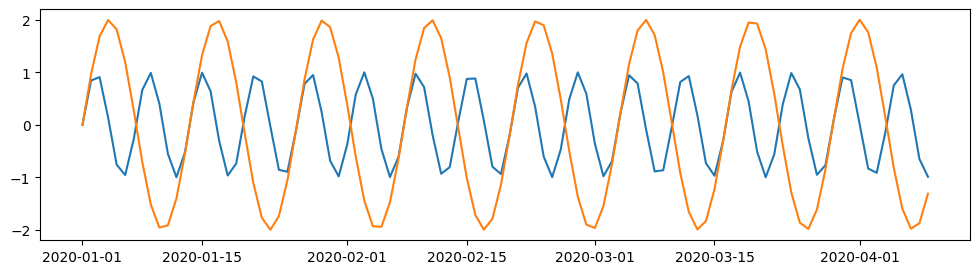

In [2]:
N = 1000
data = pd.DataFrame({
    'X1': np.sin(np.linspace(0, N/1, N)),
    'X2': np.sin(np.linspace(0, N/2, N))*2,
}, index=pd.date_range('2020-01-01', periods=N, freq='D'))

plt.figure(figsize=(12, 3))
plt.plot(data.iloc[:100]);

In [57]:
set_seed_anywhere(seed=42)
vae = TCNVAE(
    hidden_dim=64,
    latent_dim=64,
    num_layers=6,
    window_size=100,
    batch_size=32,
    num_epochs=200,
    verbose=True,
    lr=0.0001,
    dropout=0.2
)
vae.fit(data)


    # hidden_dim=32,
    # latent_dim=16,
    # num_layers=4,
    # window_size=20,
    # batch_size=16,
    # num_epochs=100,
    # verbose=True,
    # lr=0.0001,
    # dropout=0.2

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name       | Type      | Params
-----------------------------------------
0 | enc        | TCNModule | 91.3 K
1 | dec        | TCNModule | 99.1 K
2 | mu         | Linear    | 4.2 K 
3 | sigma      | Linear    | 4.2 K 
4 | projection | Linear    | 130   
-----------------------------------------
198 K     Trainable params
0         Non-trainable params
198 K     Total params
0.795     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [58]:
fakes = vae.sample(data.index, n_samples=10)
fakes[0].head()

,X1,X2
2020-01-01,0.045420,-0.455623
2020-01-02,-0.072836,-1.046249
2020-01-03,-0.182607,-0.907251
2020-01-04,-0.141618,-0.838782
2020-01-05,-0.034010,0.094791


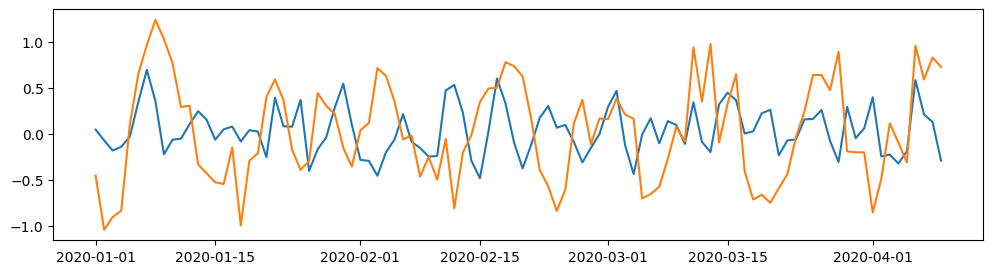

In [62]:
plt.figure(figsize=(12, 3))
plt.plot(fakes[0].iloc[:100]);